In [1]:
import nibabel as nib
import matplotlib.pylab as plt
import numpy as np
import os

In [2]:
data_directory = "./patient_data"
example_patient = "UCSF-PDGM-0135_nifti"
paths = []
for current_dir, inner_dirs, files in os.walk(data_directory + "/" + example_patient):
    for file in files:
        if file.endswith(".nii.gz"):
            file_path = current_dir + "/" + file
            paths.append(file_path.replace("\\","/"))
print(paths)
print(len(paths))

['./patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_FLAIR.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_T2.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_DTI_eddy_L2.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_ASL.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_tumor_segmentation.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_T1c.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_DTI_eddy_MD.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_SWI_bias.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_SWI.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_T1_bias.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_FLAIR_bias.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_DTI_eddy_L3.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_DWI_bias.nii.gz', './patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_DTI_eddy_L1.nii.gz', './patient_data/UCSF

# MRI Scan Types and Information 
T1      → anatomical detail\
T1c/T1ce→ tumor enhancement (post-contrast)\
T2      → edema and fluid\
FLAIR   → lesions and tumor extent\
SEG     → ground-truth mask (labels) \
BRAIN_SEG → Defines the boundaries of the brain, required for mask to exclude outside region of brain

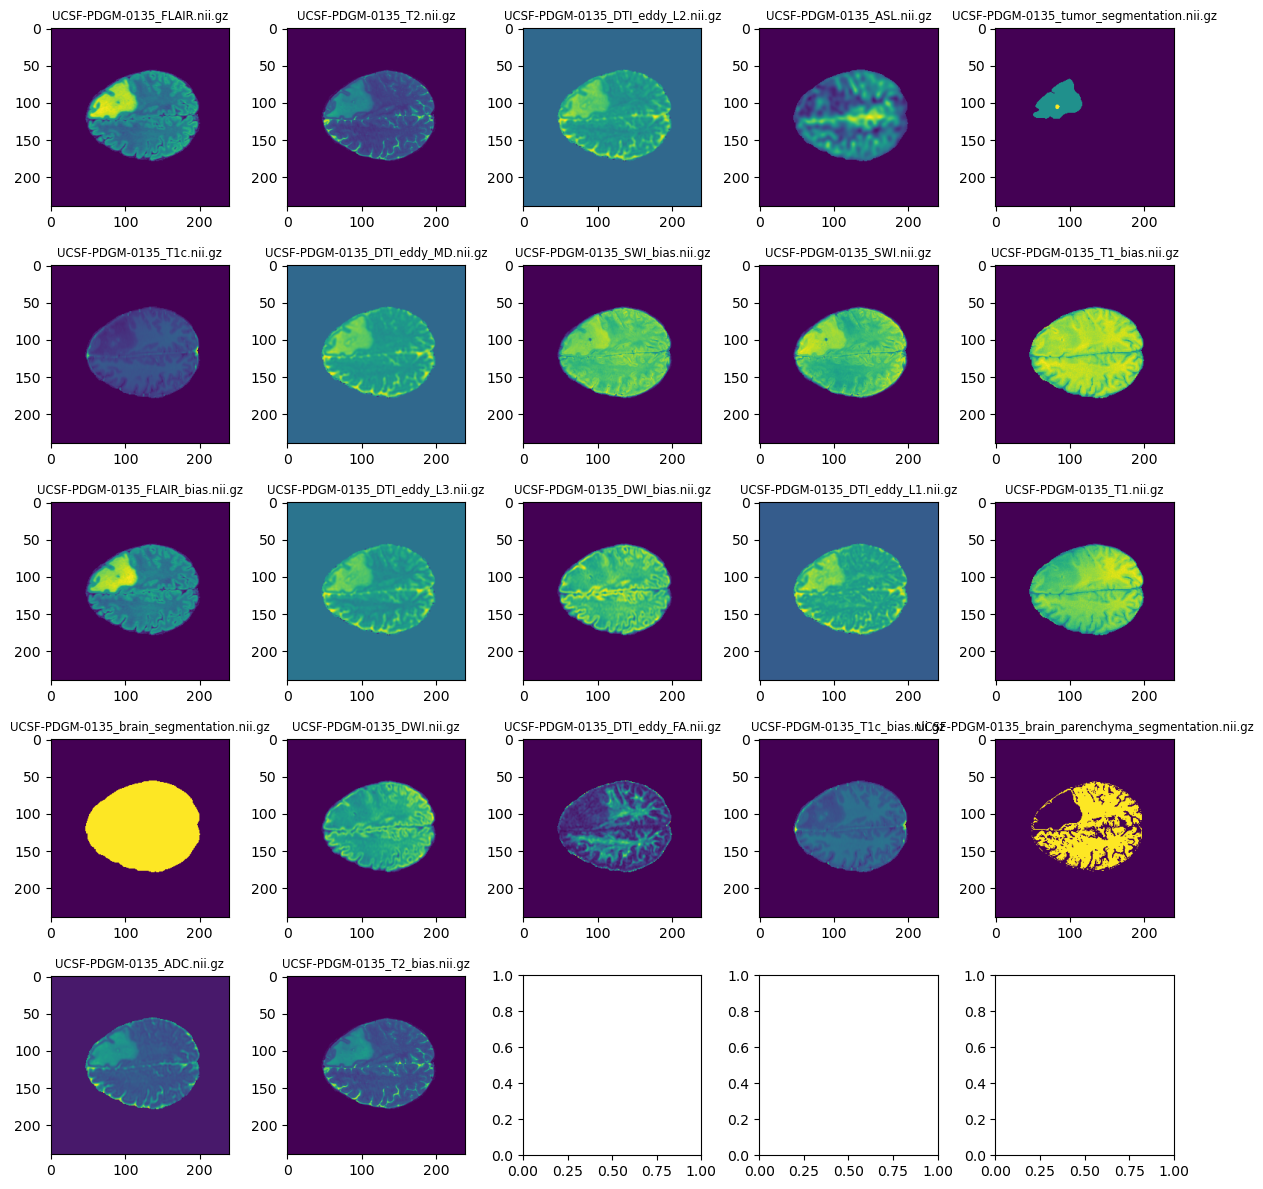

In [3]:
slice = 120
plt.style.use('default')
fig, axes = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axes.reshape(-1)):
    if i >= len(paths):
        continue
    file_path = paths[i]
    img = nib.load(file_path).get_fdata()
    if img.shape == (240,240,155):
        ax.imshow(img[:,:, slice])
    ax.set_title(file_path.split("/")[-1], fontsize="small")
fig.tight_layout()
plt.show()

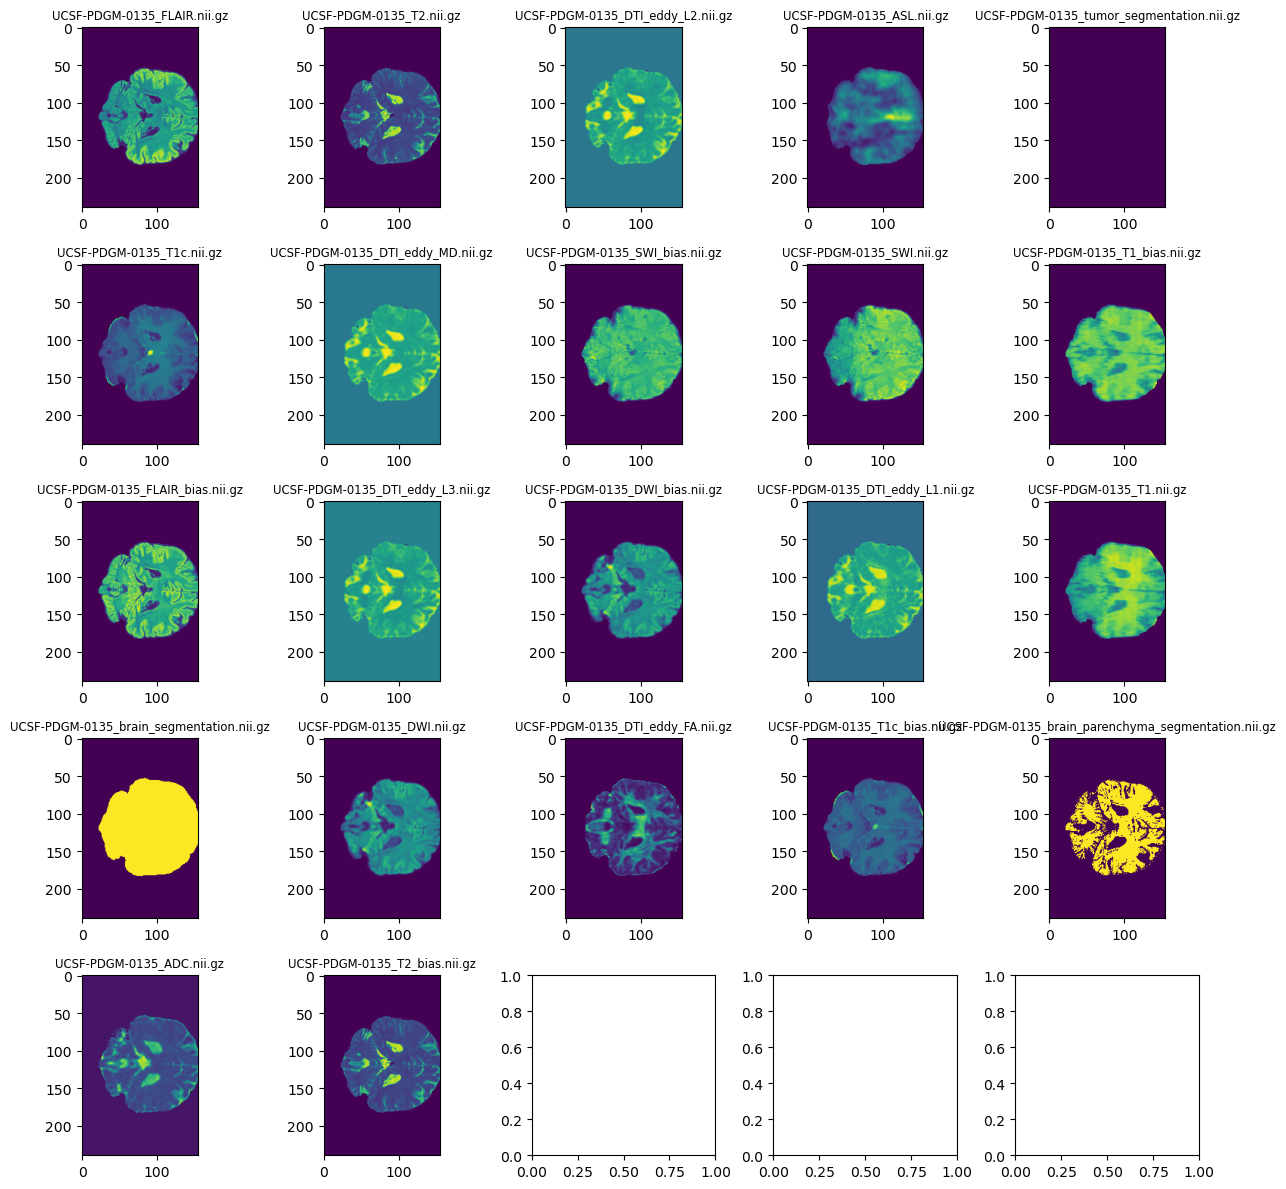

In [4]:
slice = 150
plt.style.use('default')
fig, axes = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axes.reshape(-1)):
    if i >= len(paths):
        continue
    file_path = paths[i]
    img = nib.load(file_path).get_fdata()
    if img.shape == (240,240,155):
        ax.imshow(img[:,slice, :])
    ax.set_title(file_path.split("/")[-1], fontsize="small")
fig.tight_layout()
plt.show()

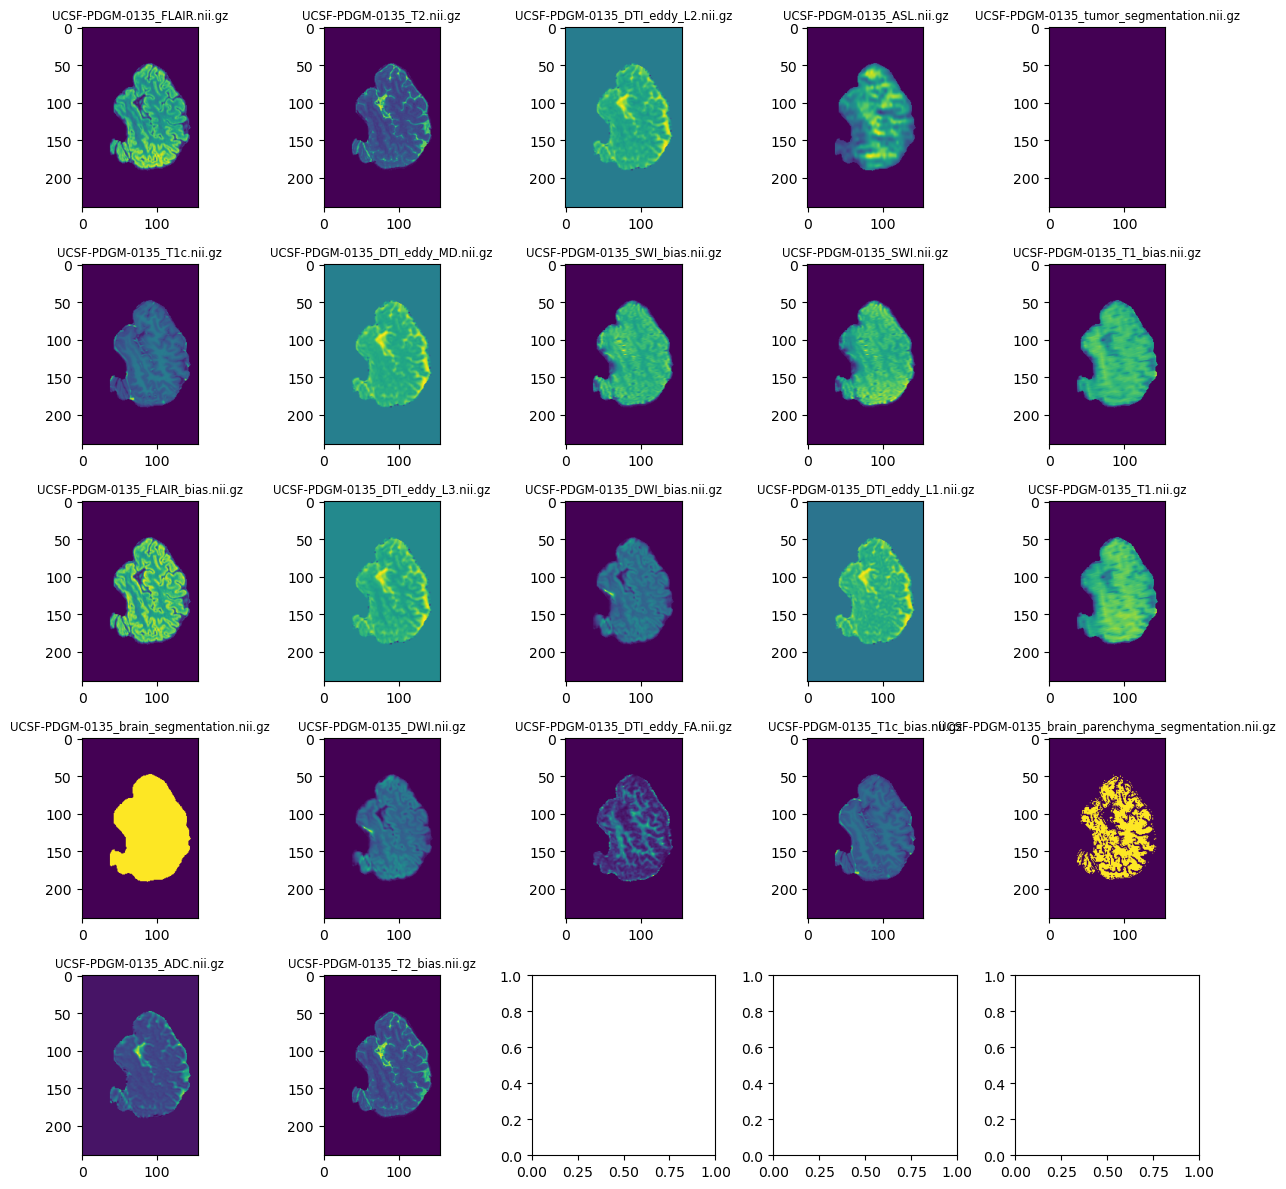

In [5]:
slice = 161
plt.style.use('default')
fig, axes = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axes.reshape(-1)):
    if i >= len(paths):
        continue
    file_path = paths[i]
    img = nib.load(file_path).get_fdata()
    if img.shape == (240,240,155):
        ax.imshow(img[slice,:,:])
    ax.set_title(file_path.split("/")[-1], fontsize="small")
fig.tight_layout()
plt.show()

This is the data from UCSF-PDGM-0135_FLAIR.nii.gz
(240, 240, 155)


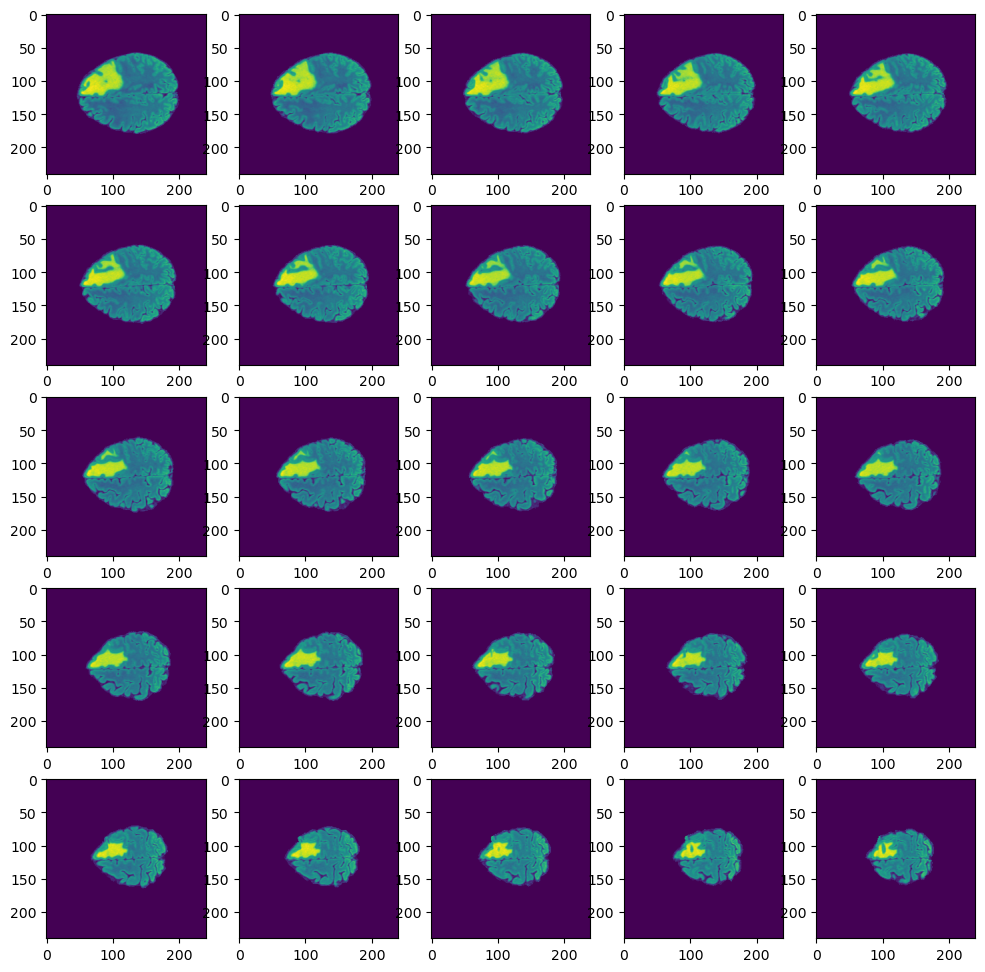

In [6]:
file_path = paths[0]
starting_slice = 120
print("This is the data from", file_path.split("/")[-1])
img = nib.load(file_path).get_fdata()
print(img.shape)
plt.style.use('default')
fig, axes = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img[:,:, starting_slice + i])
plt.show()

# Looking at patient metadata

In [7]:
import pandas as pd
df = pd.read_csv("UCSF-PDGM-metadata_v5.csv")
num_files = len([f for f in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, f))])
print(f"Unfiltered Number of patients: {num_files}")
df

Unfiltered Number of patients: 228


,ID,Sex,Age at MRI,WHO CNS Grade,Final pathologic diagnosis (WHO 2021),MGMT status,MGMT index,1p/19q,IDH,1-dead 0-alive,OS,EOR,Biopsy prior to imaging,BraTS21 ID,BraTS21 Segmentation Cohort,BraTS21 MGMT Cohort
0,UCSF-PDGM-004,M,66,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,1303.0,STR,No,BraTS2021_00097,Training,Training
1,UCSF-PDGM-005,F,80,4,"Glioblastoma, IDH-wildtype",indeterminate,unknown,unknown,wildtype,1,274.0,biopsy,No,NaN,NaN,NaN
2,UCSF-PDGM-007,M,70,4,"Glioblastoma, IDH-wildtype",indeterminate,unknown,unknown,wildtype,1,417.0,STR,No,BraTS2021_00103,Training,NaN
3,UCSF-PDGM-008,M,70,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,185.0,STR,No,NaN,NaN,NaN
4,UCSF-PDGM-009,F,68,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,389.0,STR,No,BraTS2021_00049,Training,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,UCSF-PDGM-537,M,64,4,"Glioblastoma, IDH-wildtype",positive,16,intact,wildtype,0,334.0,biopsy,Yes,NaN,NaN,NaN
497,UCSF-PDGM-538,F,41,4,"Glioblastoma, IDH-wildtype",negative,0,intact,wildtype,0,287.0,GTR,No,NaN,NaN,NaN
498,UCSF-PDGM-539,M,72,4,"Glioblastoma, IDH-wildtype",positive,12,intact,wildtype,0,291.0,GTR,No,NaN,NaN,NaN
499,UCSF-PDGM-540,F,70,2,"Oligodendroglioma, IDH-mutant, 1p/19q-codeleted",positive,17,co-deletion,IDH1 p.R132H,0,215.0,STR,No,NaN,NaN,NaN


# Goal for Processed Data 
          ┌────────────────────────────────────┐
          │          MRI Patient Data          │
          │  T1, T1c, T2, FLAIR, SEG masks     │
          └────────────────────────────────────┘
                           │
                           ▼
          ┌────────────────────────────────────┐
          │        Preprocessing Pipeline       │
          │  canonicalize + normalize + bbox    │
          └────────────────────────────────────┘
                           │
                           ▼
          ┌────────────────────────────────────┐
          │   Patch Sampling (pos/neg)         │
          │  → 96³ cubes labeled 1 or 0       │
          └────────────────────────────────────┘
                           │
                           ▼
          ┌────────────────────────────────────┐
          │       CNN Model (3D)               │
          │  Input:  [4,96,96,96]           │
          │  Output: presence, type            │
          └────────────────────────────────────┘
                           │
                           ▼
          ┌────────────────────────────────────┐
          │        Training & Evaluation       │
          │  Loss = BCE + CE (tumor type)      │
          │  Metrics: Dice, AUC, Accuracy      │
          └────────────────────────────────────┘

# Below is helper functions used to process data

In [8]:
import os, glob
import numpy as np
import nibabel as nib
from scipy.ndimage import binary_dilation

# -----------------------------
# config
# -----------------------------
data_directory = "./patient_data"
example_patient = "UCSF-PDGM-0135_nifti"  # folder name
patch_size = (96, 96, 96)              # change if you like
rng = np.random.default_rng(0)

# -----------------------------
# helpers
# -----------------------------

# Loading specific files
def load_nii(path):
    if not isinstance(path, str) or path.strip() in ["", ".", "./"]:
        raise ValueError(f"Invalid file path given: {path}")
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    img = nib.load(path)
    arr = img.get_fdata(dtype=np.float32)
    return arr, img.affine


# MR intensities vary between scanners and sessions.
# need to normalize and perform robust percentile scaling:

def robust_norm(x, mask=None, p_lo=0.5, p_hi=99.5, eps=1e-6):
    v = x[mask] if (mask is not None and np.any(mask)) else x
    lo, hi = np.percentile(v, [p_lo, p_hi])
    x = (x - lo) / max(hi - lo, eps)
    return np.clip(x, 0.0, 1.0)


# MRI volumes are huge (e.g., 240×240×155 voxels), too large to train on directly.
# will train on smaller 3D sub-volumes (patches).

def crop_or_pad(vol, center, size):
    sx, sy, sz = size
    cx, cy, cz = [int(c) for c in center]
    out = np.zeros(size, dtype=vol.dtype)

    x0, x1 = cx - sx//2, cx - sx//2 + sx
    y0, y1 = cy - sy//2, cy - sy//2 + sy
    z0, z1 = cz - sz//2, cz - sz//2 + sz

    xs0, ys0, zs0 = max(0, x0), max(0, y0), max(0, z0)
    xs1, ys1, zs1 = min(vol.shape[0], x1), min(vol.shape[1], y1), min(vol.shape[2], z1)

    ox0, oy0, oz0 = xs0 - x0, ys0 - y0, zs0 - z0
    ox1, oy1, oz1 = ox0 + (xs1 - xs0), oy0 + (ys1 - ys0), oz0 + (zs1 - zs0)

    if xs1>xs0 and ys1>ys0 and zs1>zs0:
        out[ox0:ox1, oy0:oy1, oz0:oz1] = vol[xs0:xs1, ys0:ys1, zs0:zs1]
    return out


# Use this function (bbox_from_mask) to first find where the tumor is:
# This gives the tight 3D box around the tumor.
# Purpose:
# 		Reduce search space (no need to process entire head)
# 		Focus patch sampling near informative regions
# 		Enable efficient data loading

def bbox_from_mask(mask, margin=8):
    idx = np.argwhere(mask > 0)
    if idx.size == 0:
        return (0, mask.shape[0], 0, mask.shape[1], 0, mask.shape[2])
    x0, y0, z0 = idx.min(axis=0)
    x1, y1, z1 = idx.max(axis=0) + 1
    x0 = max(0, x0 - margin); y0 = max(0, y0 - margin); z0 = max(0, z0 - margin)
    x1 = min(mask.shape[0], x1 + margin)
    y1 = min(mask.shape[1], y1 + margin)
    z1 = min(mask.shape[2], z1 + margin)
    return x0, x1, y0, y1, z0, z1


# Below function picks a random 3D center coordinate inside the MRI volume
# such that a patch centered there will not overlap with the tumor region.
# Picks a random location and draws a cube centered at an (X,Y,Z). If box overlaps with tumor attempt 
# is rejected, and tries again
# Checks added to make sure negative is inside of brain and excludes tumor. Size of patch can be adjusted, chosen to be (96,96,96)

def sample_negative_center(tumor_mask, brain_mask, size, rng,
                                  tries=500, margin=8, dilate_iter=2):

    half = np.array(size)//2
    lo = np.maximum(half + margin, 0)
    hi = np.maximum(np.array(tumor_mask.shape) - half - margin, lo + 1)

    # Exclude slightly dilated tumor for extra safety
    excl = binary_dilation(tumor_mask.astype(bool), iterations=dilate_iter)
    allowed = (brain_mask > 0) & (~excl)

    def ok(center):
        sub_t = crop_or_pad(tumor_mask, center, size)
        sub_b = crop_or_pad(brain_mask, center, size)
        return (sub_t.max() == 0) and (sub_b.max() > 0)

    # 1) random tries limited to allowed region and bounds
    xs, ys, zs = np.where(allowed)
    if len(xs):
        coords = np.stack([xs, ys, zs], axis=1)
        valid = (
            (coords[:,0] >= lo[0]) & (coords[:,0] < hi[0]) &
            (coords[:,1] >= lo[1]) & (coords[:,1] < hi[1]) &
            (coords[:,2] >= lo[2]) & (coords[:,2] < hi[2])
        )
        coords = coords[valid]
        if len(coords):
            for _ in range(min(tries, len(coords))):
                c = tuple(int(v) for v in coords[rng.integers(0, len(coords))])
                if ok(c):
                    return c

    # 2) farthest verified corners from tumor bbox center
    x0,x1,y0,y1,z0,z1 = bbox_from_mask(tumor_mask, margin=0)
    c_bbox = np.array([(x0+x1)//2, (y0+y1)//2, (z0+z1)//2])
    corners = np.array([
        [half[0], half[1], half[2]],
        [tumor_mask.shape[0]-half[0]-1, tumor_mask.shape[1]-half[1]-1, tumor_mask.shape[2]-half[2]-1]
    ], dtype=int)
    d = ((corners - c_bbox)**2).sum(axis=1)
    for idx in np.argsort(-d):
        c = tuple(int(v) for v in corners[idx])
        if ok(c):
            return c

    # 3) give up loudly so you can adjust size/tries
    raise RuntimeError("Could not find a tumor-free negative patch. Consider smaller patches or more tries.")



# -----------------------------
# locate files for this patient
# -----------------------------
patient_dir = os.path.join(data_directory, example_patient)
if not os.path.isdir(patient_dir):
    raise FileNotFoundError(f"Folder not found: {patient_dir}")

# base id (e.g., "UCSF-PDGM-0135")
base_id = example_patient.split("_nifti")[0]

# candidates per modality (prefer non-bias → bias)
cands = {
    "T1":    [f"{base_id}_T1.nii.gz",    f"{base_id}_T1_bias.nii.gz"],
    "T1c":   [f"{base_id}_T1c.nii.gz",   f"{base_id}_T1c_bias.nii.gz", f"{base_id}_T1ce.nii.gz"],
    "T2":    [f"{base_id}_T2.nii.gz"],
    "FLAIR": [f"{base_id}_FLAIR.nii.gz", f"{base_id}_FLAIR_bias.nii.gz"],
    "SEG":   [f"{base_id}_tumor_segmentation.nii.gz"],
    "BRAIN_SEG":[f"{base_id}_brain_segmentation.nii.gz"]
}

#Function that prefers the non-biased candidate images. Only uses half 
def pick_first_existing(names):
    for n in names:
        p = os.path.join(patient_dir, n)
        if os.path.exists(p):
            return p
    return None

paths = {k: pick_first_existing(v) for k, v in cands.items()}

print("Discovered files:")
for k, p in paths.items():
    print(f"  {k:5s} -> {p}")

if paths["SEG"] is None:
    raise FileNotFoundError("Tumor segmentation not found for this patient.")

# -----------------------------
# load arrays, normalize, stack
# -----------------------------
modalities_order = ["T1", "T1c", "T2", "FLAIR"]
arrays = []
shape_ref = None

# load seg first (for sampling)
seg, _ = load_nii(paths["SEG"])
seg_bin = (seg > 0).astype(np.uint8)

brain_mask = None
if paths["BRAIN_SEG"] is not None:
    brain_mask, _ = load_nii(paths["BRAIN_SEG"])
    brain_mask = (brain_mask > 0).astype(np.uint8)
else:
    print("No brain mask found, generating from FLAIR.")
    flair_path = paths["FLAIR"]
    if flair_path:
        flair, _ = load_nii(flair_path)
        thr = np.percentile(flair[flair > 0], 2)
        brain_mask = (flair > thr).astype(np.uint8)
    else:
        brain_mask = np.ones(seg_bin.shape, dtype=np.uint8)



for m in modalities_order:
    p = paths[m]
    if p is None:
        # zero channel if missing
        if shape_ref is None:
            # fall back to seg shape
            shape_ref = seg_bin.shape
        arrays.append(np.zeros(shape_ref, dtype=np.float32))
        continue

    vol, _ = load_nii(p)
    if shape_ref is None:
        shape_ref = vol.shape
    # if shapes differ (rare), you should resample—here we assert same, would be a possible issue when applying to different datasets
    if vol.shape != shape_ref:
        raise ValueError(f"Shape mismatch for {m}: {vol.shape} vs {shape_ref} (resample needed)")
    # robust normalize within nonzero voxels
    nz = vol != 0
    vol_n = robust_norm(vol, mask=nz if np.any(nz) else None)
    arrays.append(vol_n.astype(np.float32))

X = np.stack(arrays, axis=0)  # [C, X, Y, Z]
print("Stacked image tensor shape (C, X, Y, Z):", X.shape)
print("Segmentation shape:", seg_bin.shape, "Tumor voxels:", int(seg_bin.sum()))


# -----------------------------
# sample a positive and negative patch
# -----------------------------
# positive center: random tumor voxel, else bbox center

tumor_vox = np.argwhere(seg_bin > 0)
if tumor_vox.size:
    c_pos = tuple(tumor_vox[rng.integers(0, len(tumor_vox))].tolist())
else:
    x0,x1,y0,y1,z0,z1 = bbox_from_mask(seg_bin, margin=0)
    c_pos = ((x0+x1)//2, (y0+y1)//2, (z0+z1)//2)

c_neg = sample_negative_center(seg_bin, brain_mask, patch_size, rng)

patch_pos = np.stack([crop_or_pad(ch, c_pos, patch_size) for ch in X], axis=0)
patch_neg = np.stack([crop_or_pad(ch, c_neg, patch_size) for ch in X], axis=0)
mask_pos  = crop_or_pad(seg_bin, c_pos, patch_size)
mask_neg  = crop_or_pad(seg_bin, c_neg, patch_size)


print("Positive patch:", patch_pos.shape, " contains tumor:", bool(mask_pos.max()))
print("Negative patch:", patch_neg.shape, " contains tumor:", bool(mask_neg.max()))

Discovered files:
  T1    -> ./patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_T1.nii.gz
  T1c   -> ./patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_T1c.nii.gz
  T2    -> ./patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_T2.nii.gz
  FLAIR -> ./patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_FLAIR.nii.gz
  SEG   -> ./patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_tumor_segmentation.nii.gz
  BRAIN_SEG -> ./patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-0135_brain_segmentation.nii.gz
Stacked image tensor shape (C, X, Y, Z): (4, 240, 240, 155)
Segmentation shape: (240, 240, 155) Tumor voxels: 107095
Positive patch: (4, 96, 96, 96)  contains tumor: True
Negative patch: (4, 96, 96, 96)  contains tumor: False


# Below code shows bounding box of region and z slice that includes the larges tumor area 

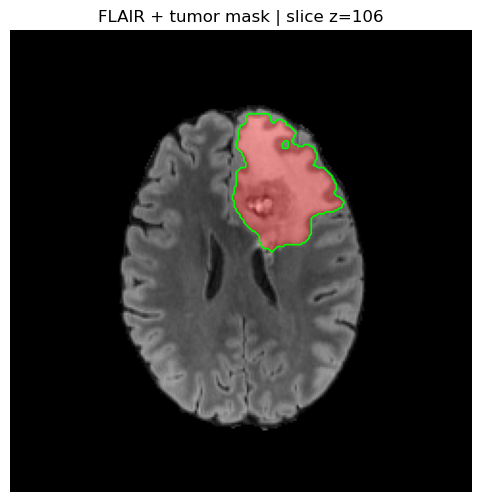

In [9]:
# MRI data can be stored in different spatial orientations (LPS, RAS, etc.).
# We use nib.as_closest_canonical() to align all scans to a consistent reference orientation (RAS)
# This ensures the segmentation aligns perfectly with the anatomical data.

def load_canonical(path):
    img = nib.load(path)
    img_can = nib.as_closest_canonical(img)  # reorient to RAS
    arr = img_can.get_fdata(dtype=np.float32)
    return arr, img_can.affine

# Re-load FLAIR and SEG in canonical RAS (safer for alignment/overlay)
flair_path = paths["FLAIR"]
seg_path   = paths["SEG"]
if flair_path is None:
    raise FileNotFoundError("No FLAIR found to visualize. Edit code to use another modality.")

flair_can, aff_flair = load_canonical(flair_path)
seg_can,   aff_seg   = load_canonical(seg_path)
seg_bin_can = (seg_can > 0).astype(np.uint8)

# Quick shape check (strict). If mismatch, you should resample seg -> flair grid.
if flair_can.shape != seg_bin_can.shape:
    print("WARNING: FLAIR and segmentation shapes differ:", flair_can.shape, seg_bin_can.shape)
    print("You should resample the segmentation to the FLAIR grid before overlaying.")
    # Optional quick nearest-neighbor resample with nilearn if available:
    try:
        from nilearn.image import resample_to_img
        seg_img = nib.Nifti1Image(seg_can.astype(np.float32), aff_seg)
        fl_img  = nib.Nifti1Image(flair_can.astype(np.float32), aff_flair)
        seg_res = resample_to_img(seg_img, fl_img, interpolation="nearest")
        seg_bin_can = (seg_res.get_fdata() > 0).astype(np.uint8)
        print("Resampled segmentation to FLAIR grid:", seg_bin_can.shape)
    except Exception as e:
        print("Resample skipped (install nilearn for convenience). Proceeding may misalign overlay.")

# Pick slice with max tumor area (axial = along Z)
tumor_area_by_slice = seg_bin_can.sum(axis=(0,1))  # sum over x,y → per-z slice area
z = int(np.argmax(tumor_area_by_slice)) if tumor_area_by_slice.max() > 0 else flair_can.shape[2]//2

# Plot for sanity checking bbox works
plt.figure(figsize=(6,6))
plt.imshow(flair_can[:,:,z].T, cmap="gray", origin="lower")  # transpose for radiological view
alpha = np.where(seg_bin_can[:,:,z].T>0, 0.35, 0.0)          # semi-transparent where mask=1
overlay = np.ma.masked_where(seg_bin_can[:,:,z].T==0, seg_bin_can[:,:,z].T)
plt.imshow(overlay, cmap="autumn", origin="lower", alpha=0.35)
# Optional contour
import matplotlib
cs = plt.contour(seg_bin_can[:,:,z].T, levels=[0.5], colors=["lime"], linewidths=1.2, origin="lower")
plt.title(f"FLAIR + tumor mask | slice z={z}")
plt.axis("off")
plt.show()

# Put patients into Train/Val and Test splits

In [10]:
from pathlib import Path
import os, re, pandas as pd

DATA_ROOT = Path("./patient_data")  # adjust
MODS = ["T1","T1c","T2","FLAIR"]

# Lowercase helpers
def _canon(s): return s.lower().replace("\\","/")

def find_first(patient_dir: Path, patterns):
    """
    patterns: list of regex strings (lowercased) matched against filename only.
    Returns the first path that matches any pattern. Tries .nii.gz then .nii.
    """
    files = [p for p in patient_dir.iterdir() if p.is_file()]
    # search order: .nii.gz first, then .nii
    files = sorted(files, key=lambda p: (0 if p.suffixes==['.nii','.gz'] else 1, p.name.lower()))
    for pat in patterns:
        rx = re.compile(pat)
        for f in files:
            name = f.name.lower()
            if rx.search(name):
                return str(f)
    return ""

def patient_folders(root: Path):
    # folders like UCSF-PDGM-XXXX_nifti
    return sorted([p for p in root.iterdir() if p.is_dir() and p.name.endswith("_nifti")])

def base_id_from_folder(folder: Path):
    return folder.name.replace("_nifti","")

def build_manifest(root: Path):
    rows = []
    for folder in patient_folders(root):
        base_id = base_id_from_folder(folder)
        # Flexible patterns (all lowercase)
        t1_patterns    = [rf"{re.escape(base_id.lower())}.*_t1(_bias)?\.nii(\.gz)?$"]
        t1c_patterns   = [
            rf"{re.escape(base_id.lower())}.*_t1c(_bias)?\.nii(\.gz)?$",
            rf"{re.escape(base_id.lower())}.*_t1ce(_bias)?\.nii(\.gz)?$",
        ]
        t2_patterns    = [rf"{re.escape(base_id.lower())}.*_t2(_bias)?\.nii(\.gz)?$"]
        flair_patterns = [rf"{re.escape(base_id.lower())}.*_flair(_bias)?\.nii(\.gz)?$"]
        seg_patterns   = [rf"{re.escape(base_id.lower())}.*tumor_segmentation.*\.nii(\.gz)?$"]
        brain_patterns = [rf"{re.escape(base_id.lower())}.*brain_segmentation.*\.nii(\.gz)?$"]

        rec = {
            "patient_id": base_id,
            "folder": str(folder),
            "T1":        find_first(folder, t1_patterns),
            "T1c":       find_first(folder, t1c_patterns),
            "T2":        find_first(folder, t2_patterns),
            "FLAIR":     find_first(folder, flair_patterns),
            "SEG":       find_first(folder, seg_patterns),
            "BRAIN_SEG": find_first(folder, brain_patterns),
        }
        rows.append(rec)
    return pd.DataFrame(rows)

def exists(p):
    return isinstance(p, str) and len(p.strip()) > 0 and os.path.exists(p)


df = build_manifest(DATA_ROOT)

# Cleaning and Removing patients that are missing SEG or BRAIN_SEG scans
# These scans are used in creating a patch of tumor (1) and a negative patch (0) to train the NN

print(f"Total patients: {len(df)} \n")
# Report missing counts before filtering
for col in ["T1","T1c","T2","FLAIR","SEG","BRAIN_SEG"]:
    miss = (~df[col].apply(exists)).sum()
    print(f"{col}: {miss} missing")

# Filter: require SEG and BRAIN_SEG; allow modalities to be missing (we’ll zero-fill channels)


# Keep only rows where both SEG and BRAIN_SEG exist
df = df[df["SEG"].apply(exists) & df["BRAIN_SEG"].apply(exists)].reset_index(drop=True)

print(f"\nRemaining patients: {len(df)}")
print(f"Dropped patients missing either SEG or BRAIN_SEG\n")
for col in ["T1","T1c","T2","FLAIR","SEG","BRAIN_SEG"]:
    miss = (~df[col].apply(exists)).sum()
    print(f"Updated: {col}: {miss} missing")


# Deterministic split by patient 
# Need to split into train and validation set, and finally test set

h = df["patient_id"].apply(lambda s: abs(hash(s)) % 100)
df.loc[h < 70, "split"] = "train"
df.loc[(h >= 70) & (h < 85), "split"] = "val"
df.loc[h >= 85, "split"] = "test"
df

Total patients: 228 

T1: 21 missing
T1c: 17 missing
T2: 21 missing
FLAIR: 17 missing
SEG: 36 missing
BRAIN_SEG: 20 missing

Remaining patients: 189
Dropped patients missing either SEG or BRAIN_SEG

Updated: T1: 4 missing
Updated: T1c: 1 missing
Updated: T2: 1 missing
Updated: FLAIR: 1 missing
Updated: SEG: 0 missing
Updated: BRAIN_SEG: 0 missing


,patient_id,folder,T1,T1c,T2,FLAIR,SEG,BRAIN_SEG,split
0,UCSF-PDGM-0135,patient_data/UCSF-PDGM-0135_nifti,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,train
1,UCSF-PDGM-0136,patient_data/UCSF-PDGM-0136_nifti,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,train
2,UCSF-PDGM-0137,patient_data/UCSF-PDGM-0137_nifti,patient_data/UCSF-PDGM-0137_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0137_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0137_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0137_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0137_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0137_nifti/UCSF-PDGM-01...,val
3,UCSF-PDGM-0139,patient_data/UCSF-PDGM-0139_nifti,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,train
4,UCSF-PDGM-0140,patient_data/UCSF-PDGM-0140_nifti,patient_data/UCSF-PDGM-0140_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0140_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0140_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0140_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0140_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0140_nifti/UCSF-PDGM-01...,val
...,...,...,...,...,...,...,...,...,...
184,UCSF-PDGM-0386,patient_data/UCSF-PDGM-0386_nifti,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,train
185,UCSF-PDGM-0387,patient_data/UCSF-PDGM-0387_nifti,patient_data/UCSF-PDGM-0387_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0387_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0387_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0387_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0387_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0387_nifti/UCSF-PDGM-03...,val
186,UCSF-PDGM-0388,patient_data/UCSF-PDGM-0388_nifti,patient_data/UCSF-PDGM-0388_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0388_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0388_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0388_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0388_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0388_nifti/UCSF-PDGM-03...,val
187,UCSF-PDGM-0389,patient_data/UCSF-PDGM-0389_nifti,patient_data/UCSF-PDGM-0389_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0389_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0389_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0389_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0389_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0389_nifti/UCSF-PDGM-03...,train


In [11]:
import os
import numpy as np
%env PYTORCH_ENABLE_MPS_FALLBACK=1
import torch
from torch.utils.data import Dataset, DataLoader


class MRIPatchDataset(Dataset):
    def __init__(self, df, split="train", patch_size=(96,96,96), pos_fraction=0.6,
                 patches_per_patient=8, seed=0):
        self.df = df[df["split"]==split].reset_index(drop=True)
        self.patch = tuple(patch_size)
        self.pos_fraction = float(pos_fraction)
        self.ppp = int(patches_per_patient)
        self.rng = np.random.default_rng(seed)

    def __len__(self):
        return len(self.df) * self.ppp

    def _load_patient(self, row):
        # load seg
        seg, _ = load_nii(row["SEG"])
        seg_bin = (seg > 0).astype(np.uint8)

        # brain mask: use provided or estimate from FLAIR
        if isinstance(row.get("BRAIN_SEG",""), str) and os.path.exists(row["BRAIN_SEG"]):
            brain, _ = load_nii(row["BRAIN_SEG"])
            brain_mask = (brain > 0).astype(np.uint8)
        else:
            flair, _ = load_nii(row["FLAIR"])
            thr = np.percentile(flair[flair>0], 2) if np.any(flair>0) else 0.0
            brain_mask = (flair > thr).astype(np.uint8)

        # modalities (assumes already on same grid; if not, add resampling)
        arrays, shape_ref = [], None
        for m in MODS:
            p = row.get(m, "")
            if isinstance(p, str) and os.path.exists(p):
                vol, _ = load_nii(p)
                if shape_ref is None:
                    shape_ref = vol.shape
                if vol.shape != shape_ref:
                    raise ValueError(f"Shape mismatch for {m}: {vol.shape} vs {shape_ref} (add resampling)")
                nz = vol != 0
                vol = robust_norm(vol, mask=nz if np.any(nz) else None).astype(np.float32)
                arrays.append(vol)
            else:
                if shape_ref is None: shape_ref = seg_bin.shape
                arrays.append(np.zeros(shape_ref, dtype=np.float32))

        X = np.stack(arrays, axis=0)  # [C,D,H,W]
        return X, seg_bin, brain_mask



    # This uses the random number generator for each patient to decide if there will be a positive or negative image, may change so theres both per patient if possible
    def __getitem__(self, idx):
        # map idx -> patient
        pid_idx = idx // self.ppp
        row = self.df.iloc[pid_idx].to_dict()
        X, seg_bin, brain_mask = self._load_patient(row)

        # choose positive or negative
        if (self.rng.random() < self.pos_fraction) and (seg_bin.max() > 0):
            # positive center: random tumor voxel
            vox = np.argwhere(seg_bin > 0)
            cx, cy, cz = vox[self.rng.integers(0, len(vox))]
            center = (int(cx), int(cy), int(cz))
            y_presence = 1
        else:
            # strict tumor-free, inside brain
            center = sample_negative_center(seg_bin, brain_mask, self.patch, rng=self.rng)
            y_presence = 0

        # crop patch
        patch = np.stack([crop_or_pad(ch, center, self.patch) for ch in X], axis=0)  # [C,D,H,W]

        y_mask = crop_or_pad(seg_bin.astype(np.float32), center, self.patch)  # [D,H,W]
        y_mask = torch.from_numpy(y_mask).unsqueeze(0)  # [1,D,H,W]
        return {
            "image": torch.from_numpy(patch),     # [C,D,H,W]
            "mask":  y_mask,                      # [1,D,H,W]
            "y_presence": torch.tensor(y_presence),
            "patient_id": row["patient_id"],
        }

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [12]:

train_ds = MRIPatchDataset(df, split="train", patch_size=(96,96,96),
                           pos_fraction=0.6, patches_per_patient=8, seed=0)
val_ds   = MRIPatchDataset(df, split="val",   patch_size=(96,96,96),
                           pos_fraction=0.5, patches_per_patient=8, seed=1)

# start with num_workers=0 to surface any exceptions cleanly
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_ds,   batch_size=1, shuffle=False, num_workers=0)

# smoke test
b = next(iter(train_loader))
print(b["image"].shape, b["y_presence"], b["patient_id"])
# -> torch.Size([1, 4, 96, 96, 96]) tensor([0 or 1]) ...

torch.Size([1, 4, 96, 96, 96]) tensor([0]) ['UCSF-PDGM-0312']


# Look at format of train_ds

In [13]:
train_ds.df

,patient_id,folder,T1,T1c,T2,FLAIR,SEG,BRAIN_SEG,split
0,UCSF-PDGM-0135,patient_data/UCSF-PDGM-0135_nifti,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0135_nifti/UCSF-PDGM-01...,train
1,UCSF-PDGM-0136,patient_data/UCSF-PDGM-0136_nifti,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0136_nifti/UCSF-PDGM-01...,train
2,UCSF-PDGM-0139,patient_data/UCSF-PDGM-0139_nifti,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0139_nifti/UCSF-PDGM-01...,train
3,UCSF-PDGM-0141,patient_data/UCSF-PDGM-0141_nifti,patient_data/UCSF-PDGM-0141_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0141_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0141_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0141_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0141_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0141_nifti/UCSF-PDGM-01...,train
4,UCSF-PDGM-0143,patient_data/UCSF-PDGM-0143_nifti,patient_data/UCSF-PDGM-0143_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0143_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0143_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0143_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0143_nifti/UCSF-PDGM-01...,patient_data/UCSF-PDGM-0143_nifti/UCSF-PDGM-01...,train
...,...,...,...,...,...,...,...,...,...
132,UCSF-PDGM-0381,patient_data/UCSF-PDGM-0381_nifti,patient_data/UCSF-PDGM-0381_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0381_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0381_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0381_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0381_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0381_nifti/UCSF-PDGM-03...,train
133,UCSF-PDGM-0383,patient_data/UCSF-PDGM-0383_nifti,patient_data/UCSF-PDGM-0383_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0383_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0383_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0383_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0383_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0383_nifti/UCSF-PDGM-03...,train
134,UCSF-PDGM-0384,patient_data/UCSF-PDGM-0384_nifti,patient_data/UCSF-PDGM-0384_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0384_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0384_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0384_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0384_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0384_nifti/UCSF-PDGM-03...,train
135,UCSF-PDGM-0386,patient_data/UCSF-PDGM-0386_nifti,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,patient_data/UCSF-PDGM-0386_nifti/UCSF-PDGM-03...,train


Visualize one batch

In [14]:

def show_patch_batch(batch, slice_dim=48, modality_names=None):

    imgs = batch["image"][0].cpu().numpy()      # shape (C, X, Y, Z)
    y_presence = int(batch["y_presence"].item())
    pid = batch["patient_id"][0] if isinstance(batch["patient_id"], (list, tuple)) else batch["patient_id"]

    # optional segmentation mask if your Dataset returns it
    seg = batch.get("mask", None)
    if seg is not None:
        seg = seg[0].cpu().numpy()              # (X, Y, Z)
    z = slice_dim if slice_dim < imgs.shape[-1] else imgs.shape[-1]//2

    n_mod = imgs.shape[0]
    modality_names = modality_names or [f"Mod{i}" for i in range(n_mod)]
    fig, axes = plt.subplots(1, n_mod, figsize=(4*n_mod,4))
    if n_mod == 1:
        axes = [axes]
    for i in range(n_mod):
        ax = axes[i]
        ax.imshow(imgs[i,:,:,z].T, cmap="gray", origin="lower")
        if seg is not None:
            mask = np.ma.masked_where(seg[:,:,z].T==0, seg[:,:,z].T)
            ax.imshow(mask, cmap="autumn", alpha=0.35, origin="lower")
        ax.set_title(modality_names[i])
        ax.axis("off")

    plt.suptitle(f"Patient: {pid} | y_presence={y_presence}", fontsize=14)
    plt.tight_layout()
    plt.show()

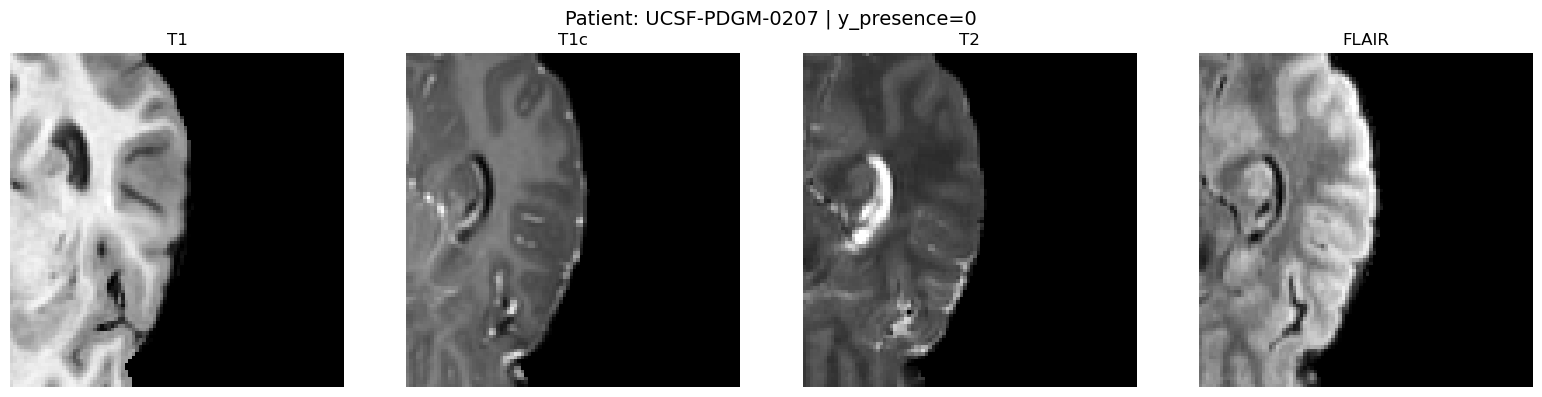

In [15]:
# Can rerun to show different patches
# May make it so theres a minimum area of brain in middle slice of each image?

b = next(iter(train_loader))
show_patch_batch(b, slice_dim=48, modality_names=["T1","T1c","T2","FLAIR"])

Shows the split for negative and positive tumor samples

In [16]:
# # class balance of sampled patches (estimate)
# import collections, itertools
# def estimate_balance(loader, n=200):
#     y = []
#     for i, b in zip(range(n), loader):
#         y.append(int(b["y_presence"]))
#     c = collections.Counter(y); print(c, "pos_rate:", c[1]/max(1,sum(c.values())))
# estimate_balance(train_loader)

# Look at 3D model

In [17]:

print("MPS:", torch.backends.mps.is_available())
import torch.nn as nn
from monai.networks.nets import UNet
import torch.nn.functional as F

# pick device: MPS -> CUDA -> CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

# Use this line for mac, but some operations not supported
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = UNet(
    spatial_dims=3,
    in_channels=len(MODS),   # e.g., 4
    out_channels=1,          # binary segmentation
    channels=(32, 64, 128, 256),
    strides=(2, 2, 2),
    num_res_units=2,
    act='PRELU'
).to(device)

MPS: True
Using device: mps


Below block helps with mac processing 3D files. can replace with pytorch function when on windows or linux, mps cannot run all functions of pytorch. 

In [19]:
def conv_block(in_ch, out_ch):
    return nn.Sequential(
        nn.Conv3d(in_ch, out_ch, kernel_size=3, padding=1, bias=False),
        nn.InstanceNorm3d(out_ch, affine=True),
        nn.LeakyReLU(0.1, inplace=True),
        nn.Conv3d(out_ch, out_ch, kernel_size=3, padding=1, bias=False),
        nn.InstanceNorm3d(out_ch, affine=True),
        nn.LeakyReLU(0.1, inplace=True),
    )

class UpBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = conv_block(in_ch, out_ch)

    def forward(self, x, skip):
        # trilinear upsample (MPS-friendly)
        x = F.interpolate(x, scale_factor=2, mode='trilinear', align_corners=False)
        # pad to match (handles odd shapes)
        if x.shape[-3:] != skip.shape[-3:]:
            dz = skip.shape[-3] - x.shape[-3]
            dy = skip.shape[-2] - x.shape[-2]
            dx = skip.shape[-1] - x.shape[-1]
            x = F.pad(x, (0, dx, 0, dy, 0, dz))
        x = torch.cat([x, skip], dim=1)
        return self.conv(x)

class UNet3D_MPS(nn.Module):
    def __init__(self, in_channels=4, base=32):
        super().__init__()
        # encoder
        self.enc1 = conv_block(in_channels, base)
        self.down1 = nn.MaxPool3d(2)
        self.enc2 = conv_block(base, base*2)
        self.down2 = nn.MaxPool3d(2)
        self.enc3 = conv_block(base*2, base*4)
        self.down3 = nn.MaxPool3d(2)
        self.bott = conv_block(base*4, base*8)
        # decoder (upsample+conv)
        self.up3 = UpBlock(base*8 + base*4, base*4)
        self.up2 = UpBlock(base*4 + base*2, base*2)
        self.up1 = UpBlock(base*2 + base, base)
        self.out = nn.Conv3d(base, 1, kernel_size=1)

    def forward(self, x):
        s1 = self.enc1(x)
        s2 = self.enc2(self.down1(s1))
        s3 = self.enc3(self.down2(s2))
        b  = self.bott(self.down3(s3))
        d3 = self.up3(b, s3)
        d2 = self.up2(d3, s2)
        d1 = self.up1(d2, s1)
        return self.out(d1)

In [20]:


def dice_loss(pred, target, eps=1e-6):
    pred = torch.sigmoid(pred)
    intersection = (pred * target).sum()
    return 1 - (2. * intersection + eps) / (pred.sum() + target.sum() + eps)

criterion = lambda pred, target: 0.5*F.binary_cross_entropy_with_logits(pred, target) + 0.5*dice_loss(pred, target)

In [21]:
criterion = nn.BCEWithLogitsLoss()

In [22]:
def dice_per_sample(logits, target, eps=1e-6):
    probs = torch.sigmoid(logits)
    probs = probs.flatten(1)    # [B, V]
    target = target.flatten(1)  # [B, V]
    has_pos = (target.sum(dim=1) > 0)
    if not has_pos.any():
        return logits.new_tensor(0.0)
    p = probs[has_pos]; t = target[has_pos]
    inter = (p * t).sum(dim=1)
    den   = p.sum(dim=1) + t.sum(dim=1) + eps
    return 1 - (2*inter / den).mean()

def seg_criterion_stable(logits, target, pos_weight=None, lambda_dice=0.5, lambda_bce=0.5):
    bce = F.binary_cross_entropy_with_logits(logits, target, pos_weight=pos_weight)
    dls = dice_per_sample(logits, target)
    return lambda_bce * bce + lambda_dice * dls

Important to note that the Y_mean is based on the voxels. So if a bounding box for a tumor is 96^3 voxels, even for a segment containing a tumor, a significant portion of the voxels are empty space. /
When combining both the y = 1 and y = 0 , this results in a majority of primarily empty space. 

In [23]:

# set this to your number of modalities
in_channels = len(MODS)  # e.g., 4 for [T1, T1c, T2, FLAIR]

model = UNet3D_MPS(in_channels=in_channels, base=32).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)

# counter class imbalance a bit
pos_weight = torch.tensor([2.0], device=device)

for epoch in range(20):
    model.train()
    total = 0.0
    for step, batch in enumerate(train_loader):
        x = batch["image"].float().to(device)      # [B,C,D,H,W]
        y = batch["mask"].float().to(device)       # [B,1,D,H,W]

        logits = model(x)
        loss = seg_criterion_stable(logits, y, pos_weight=pos_weight)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total += loss.item()

        # (optional) see if probs are moving
        if step % 50 == 0:
            with torch.no_grad():
                p_mean = torch.sigmoid(logits).mean().item()
                y_mean = y.mean().item()
            print(f"ep{epoch} it{step}: loss={loss.item():.4f}  p_mean={p_mean:.3f}  y_mean={y_mean:.3f}")

    # sync MPS for clean timing/logs
    if device.type == "mps":
        torch.mps.synchronize()
    print(f"Epoch {epoch}: loss={total/len(train_loader):.4f}")

/Users/chrisewasiuk/miniconda3/envs/fall_2025_brain_tumor_diagnosis/lib/python3.12/site-packages/torch/nn/functional.py:920: UserWarning: The operator 'aten::max_pool3d_with_indices' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1753838994289/work/aten/src/ATen/mps/MPSFallback.mm:14.)
  return torch.max_pool3d(input, kernel_size, stride, padding, dilation, ceil_mode)


ep0 it0: loss=0.3143  p_mean=0.461  y_mean=0.000
ep0 it50: loss=0.4724  p_mean=0.265  y_mean=0.201
ep0 it100: loss=0.1056  p_mean=0.173  y_mean=0.000
ep0 it150: loss=0.2659  p_mean=0.161  y_mean=0.106
ep0 it200: loss=0.2792  p_mean=0.115  y_mean=0.100
ep0 it250: loss=0.0245  p_mean=0.047  y_mean=0.000
ep0 it300: loss=0.0218  p_mean=0.039  y_mean=0.000
ep0 it350: loss=0.1961  p_mean=0.125  y_mean=0.160
ep0 it400: loss=0.1565  p_mean=0.175  y_mean=0.164
ep0 it450: loss=0.4799  p_mean=0.046  y_mean=0.007
ep0 it500: loss=0.0056  p_mean=0.011  y_mean=0.000
ep0 it550: loss=0.2016  p_mean=0.154  y_mean=0.000
ep0 it600: loss=0.0256  p_mean=0.025  y_mean=0.000
ep0 it650: loss=0.0031  p_mean=0.006  y_mean=0.000
ep0 it700: loss=0.0945  p_mean=0.035  y_mean=0.032
ep0 it750: loss=0.0026  p_mean=0.005  y_mean=0.000
ep0 it800: loss=0.4315  p_mean=0.114  y_mean=0.198
ep0 it850: loss=0.2454  p_mean=0.143  y_mean=0.183
ep0 it900: loss=0.0026  p_mean=0.005  y_mean=0.000
ep0 it950: loss=0.0706  p_mean=0.0

In [ ]:
from sklearn.metrics import roc_auc_score

model.eval()
preds, labels = [], []
with torch.no_grad():
    for batch in val_loader:
        x = batch["image"].float().to(device)
        y = batch["y_presence"].cpu().numpy()
        out = torch.sigmoid(model(x)).cpu().numpy()
        preds.append(out)
        labels.append(y)

auc = roc_auc_score(np.concatenate(labels), np.concatenate(preds))
print(f"Validation AUC: {auc:.3f}")

RuntimeError: ConvTranspose 3D is not supported on MPS

In [ ]:
model.load_state_dict(torch.load("model_final.pt"))
model.eval()